<a href="https://colab.research.google.com/github/izzat-ai/learning-ai/blob/main/data_visualization/seaborn/sns_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
np.random.seed(42)
data = {
    'Math': np.random.randint(40, 100, 10),
    'Physics': np.random.randint(30, 100, 10),
    'English': np.random.randint(50, 100, 10),
    'History': np.random.randint(40, 90, 10),
    'Attendance': np.random.randint(60, 100, 10)
}

df_scores = pd.DataFrame(data)
df_scores

,Math,Physics,English,History,Attendance
0,78,53,70,55,77
1,91,32,82,54,63
2,68,51,61,86,84
3,54,82,71,83,73
4,82,31,93,42,68
5,47,59,74,76,85
6,60,67,98,46,61
7,78,31,76,60,79
8,97,93,91,48,87
9,58,89,77,78,66


In [6]:
# korrelyatsiyani aniqlash
corr = df_scores.corr()
corr

,Math,Physics,English,History,Attendance
Math,1.000000,-0.297127,0.328579,-0.657064,0.054502
Physics,-0.297127,1.000000,0.050705,0.297656,0.149305
English,0.328579,0.050705,1.000000,-0.820766,-0.464221
History,-0.657064,0.297656,-0.820766,1.000000,0.316709
Attendance,0.054502,0.149305,-0.464221,0.316709,1.000000


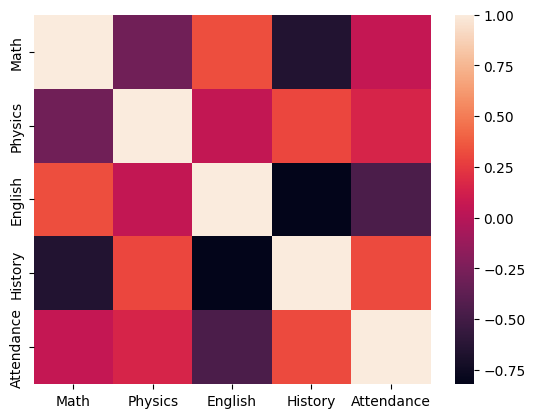

In [7]:
sns.heatmap(corr)
plt.show()

- Physics vs. History: There is a noticeable positive correlation (orange/red cell), suggesting that students who perform well in Physics tend to also perform well in History within this dataset.
- Math vs. History: This pair shows a strong negative correlation (dark purple/black cell), indicating an inverse relationship where high math scores often correspond with lower history scores.
- Attendance Impact: Attendance shows a generally positive influence on grades, with its strongest correlation appearing alongside Physics scores

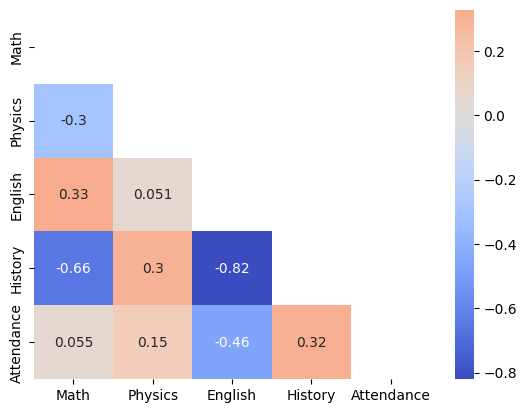

In [16]:
# ranglarni o'zgartirish
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, annot=True, center=0, cmap='coolwarm') # annot - kataklarni qiymatlarini ko'rsatadi
plt.show()

In [19]:
df1 = pd.DataFrame({
    "Math": [78, 85, 90, 88, 76, 92, 81],
    "Physics": [80, 83, 89, 90, 75, 95, 84],
    "Chemistry": [70, 78, 85, 87, 72, 88, 79],
    "Biology": [82, 86, 91, 89, 80, 93, 85]
})
df1

,Math,Physics,Chemistry,Biology
0,78,80,70,82
1,85,83,78,86
2,90,89,85,91
3,88,90,87,89
4,76,75,72,80
5,92,95,88,93
6,81,84,79,85


In [21]:
# bog'liqlikni aniqlash
corr2 = df1.corr()
corr2

,Math,Physics,Chemistry,Biology
Math,1.000000,0.949872,0.940213,0.989861
Physics,0.949872,1.000000,0.937034,0.974356
Chemistry,0.940213,0.937034,1.000000,0.945744
Biology,0.989861,0.974356,0.945744,1.000000


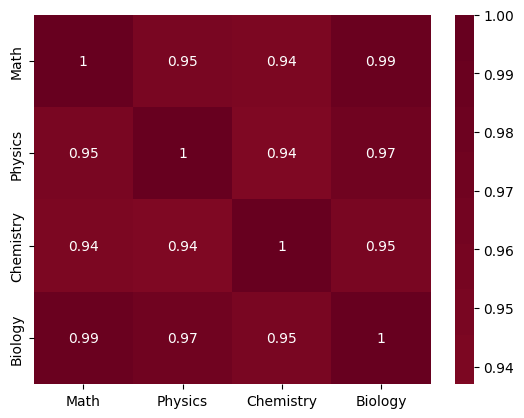

In [24]:
sns.heatmap(corr2, annot=True, cmap='RdBu_r', center=0)
plt.show()

In [25]:
df2 = pd.DataFrame({
    "Region": ["North", "South", "East", "West", "North", "South", "East", "West"],
    "Month": ["Jan", "Jan", "Jan", "Jan", "Feb", "Feb", "Feb", "Feb"],
    "Sales": [1200, 900, 1100, 1000, 1300, 950, 1150, 1050]
})
df2

,Region,Month,Sales
0,North,Jan,1200
1,South,Jan,900
2,East,Jan,1100
3,West,Jan,1000
4,North,Feb,1300
5,South,Feb,950
6,East,Feb,1150
7,West,Feb,1050


In [36]:
pivot_df2 = df2.pivot_table(index='Region', columns='Month', values='Sales', aggfunc='mean')
pivot_df2

Month,Feb,Jan
Region,,
East,1150.0,1100.0
North,1300.0,1200.0
South,950.0,900.0
West,1050.0,1000.0


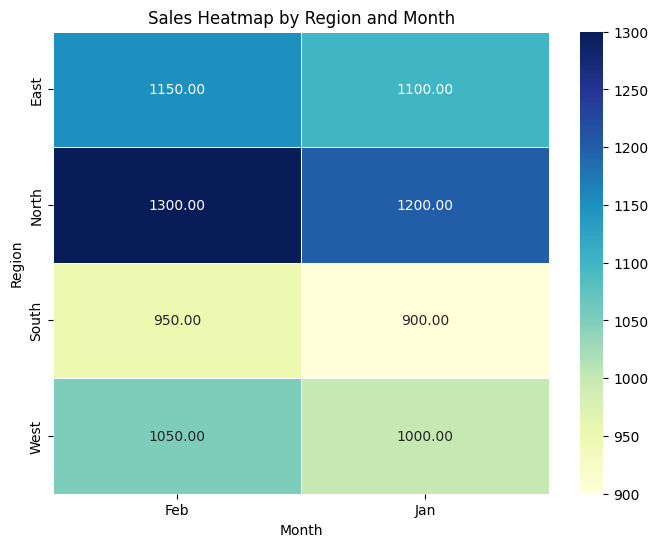

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df2, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title("Sales Heatmap by Region and Month")
plt.show()

- We can see from the graph: the most traded are in dark blue, and they are the North in January and the East in February.
- The West and South traded less than the East and North in both months, which are clearly visible in light colors.

In [46]:
np.random.seed(42)

df3 = pd.DataFrame(
    np.random.randint(10, 100, size=(6, 6)),
    columns=["A", "B", "C", "D", "E", "F"]
)
df3

,A,B,C,D,E,F
0,61,24,81,70,30,92
1,96,84,84,97,33,12
2,31,62,11,97,39,47
3,11,73,69,30,42,85
4,67,31,98,58,68,51
5,69,89,24,71,71,56


In [48]:
# bog'liqlikni aniqlash
corr_df3 = df3.corr()
corr_df3

,A,B,C,D,E,F
A,1.000000,0.049347,0.344292,0.545795,0.119923,-0.621955
B,0.049347,1.000000,-0.479557,0.161427,0.115631,-0.469699
C,0.344292,-0.479557,1.000000,-0.342676,-0.131232,0.039984
D,0.545795,0.161427,-0.342676,1.000000,-0.275836,-0.693592
E,0.119923,0.115631,-0.131232,-0.275836,1.000000,-0.068003
F,-0.621955,-0.469699,0.039984,-0.693592,-0.068003,1.000000


In [51]:
# ma'lumotlarni kerakli qismini olish uchun mask
"""mask = np.trui(corr_df3)
sns.heatmap(corr_df3, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.show()"""

"mask = np.trui(corr_df3)\nsns.heatmap(corr_df3, mask=mask, annot=True, cmap='coolwarm', center=0)\nplt.show()"